### TASK 1

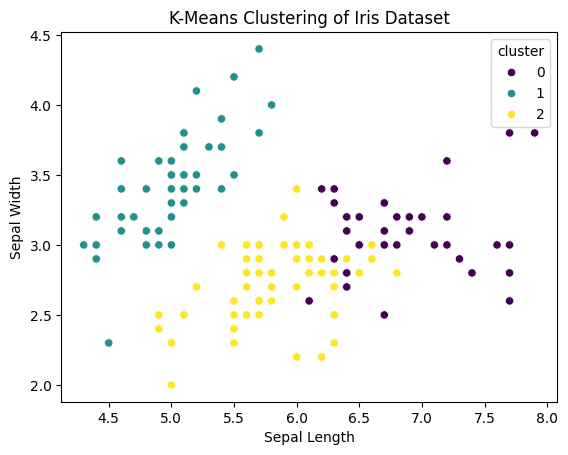

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Apply K-Means clustering and visualize the clusters
def kmeans_clustering():
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['cluster'] = kmeans.fit_predict(data.iloc[:, :-1])

    fig, ax = plt.subplots()
    sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue=data['cluster'], palette='viridis', ax=ax)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('K-Means Clustering of Iris Dataset')
    plt.show()

kmeans_clustering()


### TASK 2

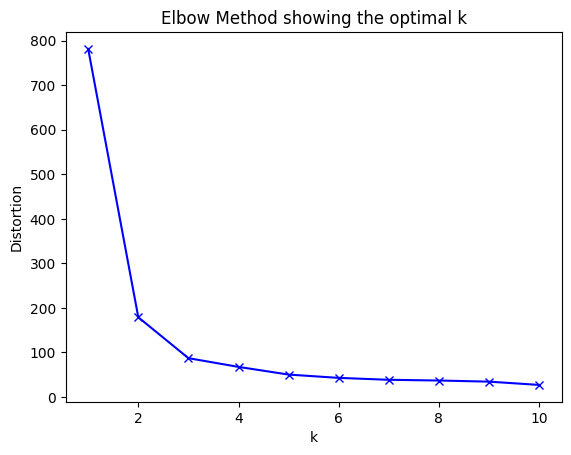

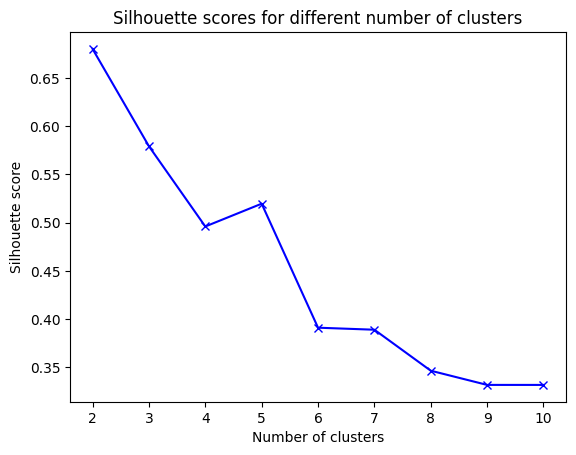

In [2]:
# Import necessary libraries
from sklearn.metrics import silhouette_score

# Use the Elbow Method and Silhouette Score to determine the optimal number of clusters
def optimal_clusters():
    # Elbow Method
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=42)
        kmeanModel.fit(data.iloc[:, :-1])
        distortions.append(kmeanModel.inertia_)

    fig, ax = plt.subplots()
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method showing the optimal k')
    plt.show()

    # Silhouette Score
    silhouette_avg = []
    for k in K[1:]:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data.iloc[:, :-1])
        cluster_labels = kmeans.labels_
        silhouette_avg.append(silhouette_score(data.iloc[:, :-1], cluster_labels))

    fig, ax = plt.subplots()
    plt.plot(K[1:], silhouette_avg, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette scores for different number of clusters')
    plt.show()

optimal_clusters()


### TASK 3

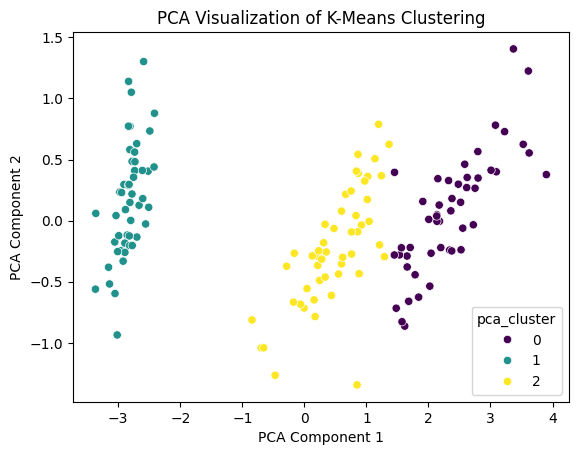

In [3]:
# Import necessary libraries
from sklearn.decomposition import PCA

# Use PCA to reduce the Iris dataset to two dimensions and visualize the clusters
def pca_visualization():
    pca = PCA(n_components=2)
    components = pca.fit_transform(data.iloc[:, :-1])

    kmeans = KMeans(n_clusters=3, random_state=42)
    data['pca_cluster'] = kmeans.fit_predict(data.iloc[:, :-1])

    fig, ax = plt.subplots()
    sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=data['pca_cluster'], palette='viridis', ax=ax)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('PCA Visualization of K-Means Clustering')
    plt.show()

pca_visualization()


### TASK 4

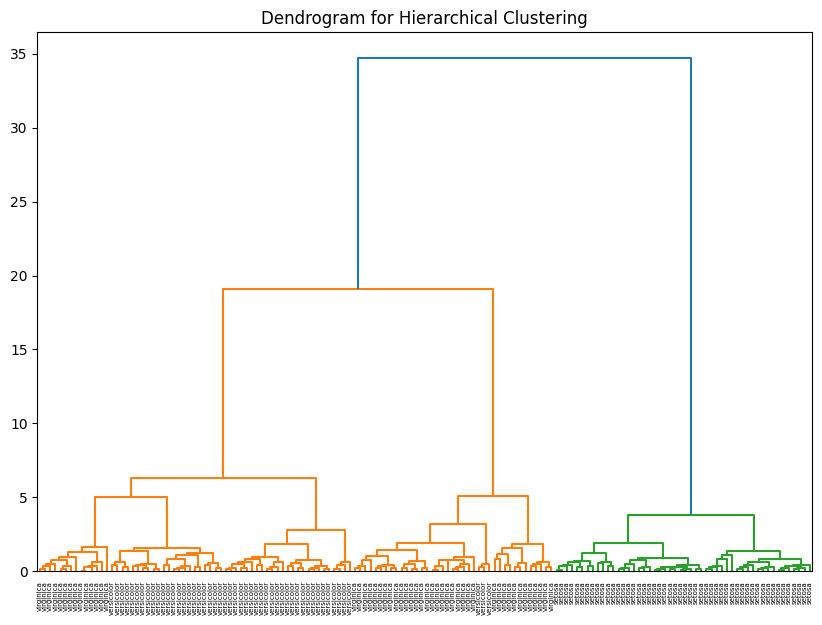

In [4]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage

# Implement hierarchical clustering and plot a dendrogram
def hierarchical_clustering():
    linked = linkage(data.iloc[:, :-1], method='ward')

    fig, ax = plt.subplots(figsize=(10, 7))
    dendrogram(linked, orientation='top', labels=iris.target_names[data['species']], distance_sort='descending', show_leaf_counts=True)
    plt.title('Dendrogram for Hierarchical Clustering')
    plt.show()

hierarchical_clustering()


### TASK 5

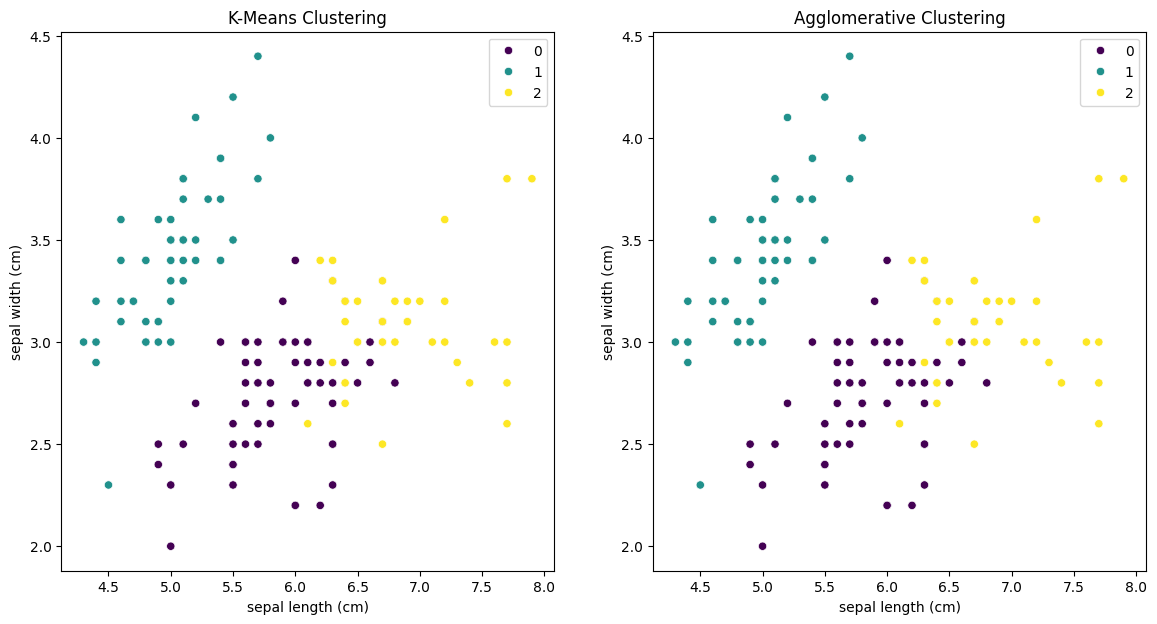

In [6]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Compare the performance of K-Means and Agglomerative Hierarchical Clustering
def compare_clustering_algorithms():
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_clusters = kmeans.fit_predict(data.iloc[:, :-1])

    agglomerative = AgglomerativeClustering(n_clusters=3)
    agglomerative_clusters = agglomerative.fit_predict(data.iloc[:, :-1])

    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue=kmeans_clusters, palette='viridis', ax=ax[0])
    ax[0].set_title('K-Means Clustering')
    sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue=agglomerative_clusters, palette='viridis', ax=ax[1])
    ax[1].set_title('Agglomerative Clustering')
    plt.show()
compare_clustering_algorithms()
